In [1]:
from pyscf import gto,scf
import numpy as np
import matplotlib.pyplot as plt
from FcMole import *

In [2]:
CO=gto.M(atom="C 0 0 0; O 0 0 2 ",unit="Bohr", basis="sto-3g")

In [3]:
%%time
mf=scf.RKS(CO)
mf.xc="PBE0"
mf.scf()

converged SCF energy = -111.621701280109
CPU times: user 7.21 s, sys: 19.7 ms, total: 7.23 s
Wall time: 294 ms


-111.6217012801086

In [4]:
#CO1=FcM_like(CO,fcs=[.01,0])
#mf1=scf.RKS(CO1)
#mf1.xc="PBE0"
#mf1.scf(dm0=P0)
#P1=mf1.make_rdm1()

In [5]:
mf_hf=scf.RHF(CO)
mf_hf.scf()
mf_hf.scf_summary

converged SCF energy = -111.199724042755


{'e1': -199.51023958281112, 'e2': 64.31051554005657, 'nuc': 24.0}

In [6]:
mf.e_tot

-111.6217012801086

In [7]:
print(dir(mf)),vars(mf)

['DIIS', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chkfile', '_eigh', '_eri', '_finalize', '_is_mem_enough', '_keys', '_method_name', '_numint', '_t0', '_w0', 'add_keys', 'analyze', 'apply', 'as_scanner', 'build', 'callback', 'canonicalize', 'check_convergence', 'check_sanity', 'chkfile', 'conv_check', 'conv_tol', 'conv_tol_grad', 'converged', 'convert_from_', 'damp', 'damp_factor', 'define_xc_', 'density_fit', 'diis', 'diis_file', 'diis_space', 'diis_space_rollback', 'diis_start_cycle', 'dip_moment', 'direct_scf', 'direct_scf_tol', 'dump_chk', 'dump_flags', 'dump_scf_summary', 'e_tot', 'eig', 'energy_elec', 'energy_nuc', 'energy_tot', 'from_chk', 'get_fock', 'get_grad', 'get

(None,
 {'mol': <pyscf.gto.mole.Mole at 0x7fb7bc1168b0>,
  'verbose': 3,
  'max_memory': 4000,
  'stdout': <ipykernel.iostream.OutStream at 0x7fb7f5cde580>,
  '_chkfile': <tempfile._TemporaryFileWrapper at 0x7fb7bc1167f0>,
  'chkfile': '/home/giorgio/Supplementary_code_for_Quantum_Alchemy/Alchemical_CPKS_perturbator/tmpvwru4mnr',
  'mo_energy': array([-19.15794687, -10.09719678,  -1.21351233,  -0.49859649,
          -0.45243652,  -0.45243652,  -0.27942261,   0.12969976,
           0.12969976,   0.86796355]),
  'mo_coeff': array([[ 3.34634493e-04,  9.92063614e-01, -1.42141926e-01,
           1.53812336e-01,  5.80421045e-16,  9.65074128e-16,
          -1.80129820e-01,  1.83625554e-16,  1.60880577e-17,
          -1.12960540e-01],
         [-1.25844621e-02,  3.31551665e-02,  2.19844148e-01,
          -4.67854881e-01, -1.84822775e-15, -2.94934511e-15,
           8.31622896e-01, -1.10421376e-15, -7.68432163e-17,
           1.12054602e+00],
         [-3.98079234e-17,  1.36296003e-18,  3.97414

In [8]:
summary=dict(mf.scf_summary)
summary

{'e1': -199.41622941625047,
 'coul': 77.70084988123743,
 'exc': -13.90632174509555,
 'nuc': 24.0}

In [9]:
sum(summary.values()) ,mf.e_tot

(-111.6217012801086, -111.6217012801086)

In [10]:
ni=mf._numint
omega, alpha, hyb = ni.rsh_and_hybrid_coeff(mf.xc, spin=mf.mol.spin)
omega, alpha, hyb

(0.0, 0.25, 0.25)

In [11]:
#P=CC^T
C=mf.mo_coeff
Pc=2*C[:,:7].dot(C.T[:7,:])
P0=mf.make_rdm1()


In [12]:
P0-Pc

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
J,K=mf.get_jk()
h1=mf.get_hcore()
F=mf.get_fock()

In [14]:
summary["e1"],np.einsum("ij,ij",h1,P0)

(-199.41622941625047, -199.41622941625047)

In [15]:
summary["coul"],np.einsum("ij,ij",J,P0)/2 # it is the HF Coulomb operator 

(77.70084988123743, 77.70084988123745)

In [16]:
summary["exc"],-np.einsum("ij,ij",K,P0)/4

(-13.90632174509555, -13.481304665613134)

In [17]:
V_eff=mf.get_veff()
np.einsum("ij,ij",V_eff.vj,P0)/2,summary["coul"]#+summary["exc"]

(77.70084988123745, 77.70084988123743)

In [18]:
vars(V_eff)

{'ecoul': 77.70084988123743,
 'exc': -13.90632174509555,
 'vj': array([[ 1.42929289e+01,  2.91199997e+00, -2.47775082e-17,
          3.49966544e-17,  1.14185217e-01,  2.59041906e-04,
          7.12136093e-01, -1.40375711e-18,  2.14110950e-18,
         -1.17494979e+00],
        [ 2.91199997e+00,  7.83772966e+00, -1.41115936e-16,
          1.96803090e-16,  1.10445102e+00,  8.18071600e-01,
          4.22002654e+00, -4.85997334e-17,  8.62636303e-17,
         -3.51062467e+00],
        [-2.47775082e-17, -1.41115936e-16,  7.57890600e+00,
         -3.16688466e-17,  2.06210956e-17, -1.14974748e-18,
         -4.26132132e-17,  2.38922158e+00,  7.23586957e-18,
          4.68721536e-17],
        [ 3.49966544e-17,  1.96803090e-16, -3.16688466e-17,
          7.57890600e+00, -1.38801728e-17,  2.53147001e-18,
          6.84166956e-17,  7.23586957e-18,  2.38922158e+00,
         -6.68827993e-17],
        [ 1.14185217e-01,  1.10445102e+00,  2.06210956e-17,
         -1.38801728e-17,  8.33570358e+00,  1.406

In [19]:
-np.einsum("ij,ji",V_eff,P0),summary["exc"],V_eff.exc

(-135.11313705103993, -13.90632174509555, -13.90632174509555)

In [20]:
-np.einsum("ij,ji",V_eff.vk,P0)/4,-np.einsum("ij,ji",V_eff,P0), summary["e1"]+summary["coul"]+summary["exc"],summary["exc"]

(-3.3703261664032835,
 -135.11313705103993,
 -135.6217012801086,
 -13.90632174509555)

In [21]:
ni=mf._numint

In [22]:
ks=mf
mol=CO
dm=P0
n, exc, vxc = ni.nr_rks(mol, ks.grids, ks.xc, dm)
n, exc, vxc 

(14.000000148684352,
 -10.535995578692267,
 array([[-1.71996375e+00, -2.41057629e-01,  3.90312782e-18,
         -1.51788304e-18,  2.70071249e-04, -1.58760958e-05,
         -5.83843075e-02,  2.32425841e-18,  2.75116301e-18,
          9.65667079e-02],
        [-2.41057629e-01, -4.50376033e-01,  1.11035855e-16,
         -3.29597460e-17, -3.87927154e-02, -7.12940610e-02,
         -2.46664657e-01,  6.69833655e-18, -6.93889390e-18,
          1.99171887e-01],
        [ 3.90312782e-18,  1.11035855e-16, -4.19073117e-01,
          2.25514052e-17, -1.71303943e-17,  3.11708125e-18,
         -2.81892565e-18, -1.31797807e-01, -2.82061971e-18,
          1.19804340e-17],
        [-1.51788304e-18, -3.29597460e-17,  2.25514052e-17,
         -4.19073117e-01,  8.45677695e-18,  2.22769665e-18,
         -4.87890978e-18, -2.14129929e-18, -1.31797807e-01,
          1.96240593e-17],
        [ 2.70071249e-04, -3.87927154e-02, -1.71303943e-17,
          8.45677695e-18, -5.01561204e-01, -1.23010517e-01,
         

In [23]:
np.einsum('ij,ji', dm, vxc).real *3/4

-10.160932783971282

In [24]:
exc,exc- np.einsum('ij,ji', dm, V_eff.vk).real * .5 * .5

(-10.535995578692267, -13.90632174509555)

In [25]:
omega, alpha, hyb = ni.rsh_and_hybrid_coeff(ks.xc, spin=mol.spin)
omega, alpha,hyb

(0.0, 0.25, 0.25)

In [26]:
ks.direct_scf

True

In [27]:
xctype=ni._xc_type(mf.xc)
ni.libxc.is_hybrid_xc(ks.xc),ni._xc_type(mf.xc)

(True, 'GGA')

In [28]:
np.allclose(ks.get_j(CO,P0),mf_hf.get_jk(CO,P0)[0]),np.allclose(ks.get_jk(CO,P0)[1],mf_hf.get_jk(CO,P0)[1])

(True, True)

In [29]:
mf_hf.get_jk,mf.get_jk

(<bound method RHF.get_jk of RHF object of <class 'pyscf.scf.hf.RHF'>>,
 <bound method RHF.get_jk of RKS object of <class 'pyscf.dft.rks.RKS'>>)

In [30]:
vars(mf.grids)

{'mol': <pyscf.gto.mole.Mole at 0x7fb7bc1168b0>,
 'stdout': <ipykernel.iostream.OutStream at 0x7fb7f5cde580>,
 'verbose': 3,
 'symmetry': False,
 'coords': array([[-4.46851140e+00, -4.46851140e+00, -2.37126186e+00],
        [-4.78551877e+00, -4.78551877e+00, -2.53948510e+00],
        [-4.48132694e+00, -4.48132694e+00, -2.48132694e+00],
        ...,
        [ 1.00000000e+04,  1.00000000e+04,  1.00000000e+04],
        [ 1.00000000e+04,  1.00000000e+04,  1.00000000e+04],
        [ 1.00000000e+04,  1.00000000e+04,  1.00000000e+04]]),
 'weights': array([1.09499036, 1.38921666, 0.01994748, ..., 0.        , 0.        ,
        0.        ]),
 'non0tab': array([[ 0, 78, 86,  0, 64, 72],
        [ 0, 83, 90,  0, 72, 80],
        [ 0, 87, 93,  0, 78, 85],
        ...,
        [ 0, 83, 90,  0, 72, 80],
        [ 0, 78, 86,  0, 66, 74],
        [ 0, 70, 78,  0, 57, 65]], dtype=uint8),
 'screen_index': array([[ 0, 78, 86,  0, 64, 72],
        [ 0, 83, 90,  0, 72, 80],
        [ 0, 87, 93,  0, 78, 85

In [31]:
mf.grids.coords.T[:]

array([[-4.46851140e+00, -4.78551877e+00, -4.48132694e+00, ...,
         1.00000000e+04,  1.00000000e+04,  1.00000000e+04],
       [-4.46851140e+00, -4.78551877e+00, -4.48132694e+00, ...,
         1.00000000e+04,  1.00000000e+04,  1.00000000e+04],
       [-2.37126186e+00, -2.53948510e+00, -2.48132694e+00, ...,
         1.00000000e+04,  1.00000000e+04,  1.00000000e+04]])

In [32]:
gv=np.where(np.array([np.linalg.norm(x) for x in mf.grids.coords])<2)
gv

(array([ 1910,  1911,  1917, ..., 21074, 21079, 21117]),)

In [33]:
gcs=mf.grids.coords[gv][::10,:]

In [34]:
len(ks.grids.weights),gcs.shape

(23136, (865, 3))

In [35]:
ni.block_loop(0,ks.grids)
ni.eval_ao

<function pyscf.dft.numint.eval_ao(mol, coords, deriv=0, shls_slice=None, non0tab=None, cutoff=None, out=None, verbose=None)>

In [36]:
ni.eval_ao(CO,np.array([[0,0,0]]))#.shape

array([[ 6.14288519e+00,  2.15554817e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.20476263e-12,
         5.57535838e-02,  0.00000000e+00,  0.00000000e+00,
        -9.24775489e-02]])

In [37]:
ao_ong=ni.eval_ao(CO,gcs)

In [38]:
ks.grids.coords[:,0]

array([-4.46851140e+00, -4.78551877e+00, -4.48132694e+00, ...,
        1.00000000e+04,  1.00000000e+04,  1.00000000e+04])

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


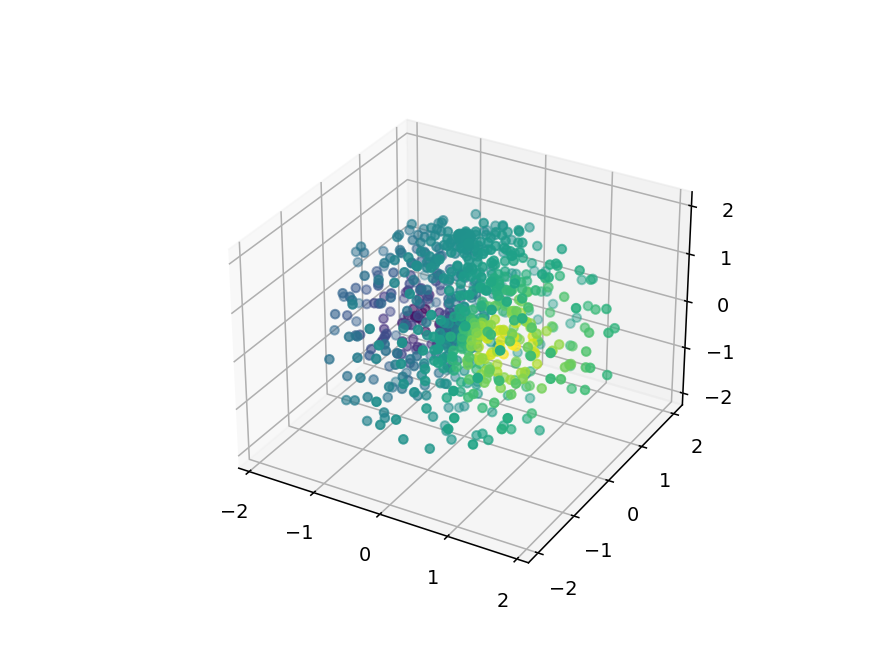

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
a=np.arange(3)
ax.scatter(gcs[:,0],gcs[:,1],gcs[:,2],c=ao_ong[:,2])
#ax.scatter(ks.grids.coords[:,0],ks.grids.coords[:,1],ks.grids.coords[:,2])

In [42]:
ni._gen_rho_evaluator(CO,P0)

(<function pyscf.dft.numint.NumInt._gen_rho_evaluator.<locals>.make_rho(idm, ao, sindex, xctype)>,
 1,
 10)

In [43]:
make_rho, nset, nao = ni._gen_rho_evaluator(mol, dm, True, False, ks.grids)

In [44]:
 make_rho

<function pyscf.dft.numint.NumInt._gen_rho_evaluator.<locals>.make_rho(idm, ao, sindex, xctype)>

In [54]:
make_rho([0,0], [ni.eval_ao(CO,mf.grids.coords)] , None, xctype)

AttributeError: 'RHF' object has no attribute 'grids'

In [47]:
dm

array([[ 2.12099928e+00, -4.40246364e-01,  1.15383142e-16,
        -1.82537456e-16,  1.34385128e-01,  1.57218097e-02,
        -1.08362578e-02, -7.40373990e-17,  2.40406978e-16,
         1.35041486e-01],
       [-4.40246364e-01,  1.92014783e+00, -4.08198402e-16,
         6.76554163e-16, -7.33584740e-01,  2.60116210e-02,
        -3.49812445e-01,  6.71863102e-16, -1.34293807e-15,
        -5.25903251e-02],
       [ 1.15383142e-16, -4.08198402e-16,  4.26508894e-01,
        -5.64879204e-16,  6.40464470e-16, -3.16479487e-17,
        -2.37384467e-16,  7.06226389e-01, -1.83411804e-16,
        -1.14156437e-16],
       [-1.82537456e-16,  6.76554163e-16, -5.64879204e-16,
         4.26508894e-01, -5.88470777e-16,  5.26626832e-16,
        -8.27311759e-16, -1.30804454e-16,  7.06226389e-01,
        -4.77754592e-16],
       [ 1.34385128e-01, -7.33584740e-01,  6.40464470e-16,
        -5.88470777e-16,  6.58190285e-01, -8.48946639e-02,
         1.59067620e-01,  4.27590260e-17,  1.66718977e-16,
        -6.

In [48]:
ao=np.zeros((1,10))
ni.eval_rho(CO, ao, dm, xctype="LDA")

array([0.])

In [49]:
ao

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
ao[0].shape

(10,)

In [51]:
from pyscf.dft.numint import eval_rho,eval_ao
mol = gto.M(atom='O 0 0 0; H 0 0 1; H 0 1 0', basis='ccpvdz')
coords = np.random.random((100,3))  # 100 random points
ao_value = eval_ao(mol, coords, deriv=0)
mf=scf.RHF(mol)
mf.scf()
dm = mf.make_rdm1()
dm = (dm + dm.T)/2
ao=np.zeros((100000,dm.shape[0]))
rho= eval_rho(mol, ao_value, dm, xctype='LDA')

converged SCF energy = -76.0167894720743


In [52]:
ao_value

array([[ 0.00281477,  0.17370168,  0.18511471, ...,  0.17745868,
        -0.23197042,  0.08423935],
       [ 0.17713957,  0.43479397,  0.2643095 , ...,  0.04433941,
        -0.20041075,  0.04053937],
       [ 0.00266928,  0.16760911,  0.18314001, ...,  0.00295965,
        -0.23944614,  0.20688607],
       ...,
       [ 0.1240927 ,  0.44439298,  0.25972134, ...,  0.07406574,
        -0.23711885,  0.00504999],
       [ 0.00738958,  0.27226992,  0.21226207, ...,  0.04802449,
        -0.10546089,  0.04103376],
       [ 0.00469914,  0.22913818,  0.20128204, ...,  0.08511365,
        -0.14678311,  0.05729007]])

In [53]:
rho

array([ 0.24074027,  0.90883223,  0.24702162,  1.00510511,  0.37162292,
        0.40482909,  0.18772577,  0.42445691,  0.52046145,  0.54103351,
        0.14555416,  0.31213637,  0.31245591,  0.31702651,  0.18252735,
        0.39411201,  0.237185  ,  0.32844325, 16.05167957,  0.46388923,
        0.27879829,  0.29917879,  0.64622685,  0.34075762,  0.51474728,
        0.22343805,  0.42482853,  0.5834868 ,  0.65419584,  0.75492623,
        0.67350702,  0.91740083,  1.72463435,  2.19923897,  0.85717071,
        0.33729375,  0.30390329,  0.70844999,  0.39078303,  0.93113454,
        0.26173022,  1.0755782 ,  0.1771167 ,  0.66642099,  0.49680296,
        0.56621451,  0.51098248,  0.25782868,  0.28746589,  0.81837982,
        0.34525653,  0.30873207,  0.294168  ,  0.23279112,  0.13683444,
        0.25106095,  0.23708173,  0.31233427,  0.63373572,  0.42375799,
        0.63141738,  0.33954226,  0.28058212, 11.79091882,  0.69878797,
        0.52179711,  0.29165637,  0.60955719,  0.31292399,  0.41